
Open3Dをインストール。
インストール後にセッションを再起動してください。

In [1]:
 !pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


Googleドライブをマウントします

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Open3DとNumpyをインポートします
import open3d as o3d
import numpy as np

点群データ（PLYファイル）をOpen3DとMatplotlibで可視化

In [3]:
# 点群ファイル（PLY）読み込み
cloud = o3d.io.read_point_cloud("/content/drive/MyDrive/Colab Notebooks/3d/02/image_in/iruka.ply")
if cloud.is_empty(): exit()

# 読み込んだデータを確認します
print(cloud)
print(np.asarray(cloud.points))

PointCloud with 570911 points.
[[-0.49188578  0.52052921  0.01525302]
 [-0.49332249  0.50989765  0.01295437]
 [-0.4970578   0.51880497  0.01582769]
 ...
 [ 0.543944   -0.52938133  0.02186164]
 [ 0.54135811 -0.52535874  0.02387297]
 [ 0.54308188 -0.52823216  0.02301097]]


In [4]:
# Matplotlibで点群ファイルを表示します
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
# 点群データをnp.array形式に変換します
points = np.asarray(cloud.points)

In [6]:
# 色データをnp.array形式に変換します
colors = np.asarray(cloud.colors)
print(colors)

[[0.58823529 0.57254902 0.55686275]
 [0.63529412 0.63529412 0.61960784]
 [0.60392157 0.60392157 0.57254902]
 ...
 [0.61960784 0.60392157 0.57254902]
 [0.80784314 0.79215686 0.76078431]
 [0.72941176 0.71372549 0.69803922]]


In [7]:
# 表示サイズを指定
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [10,10]   # 図の幅と高さをインチで指定する

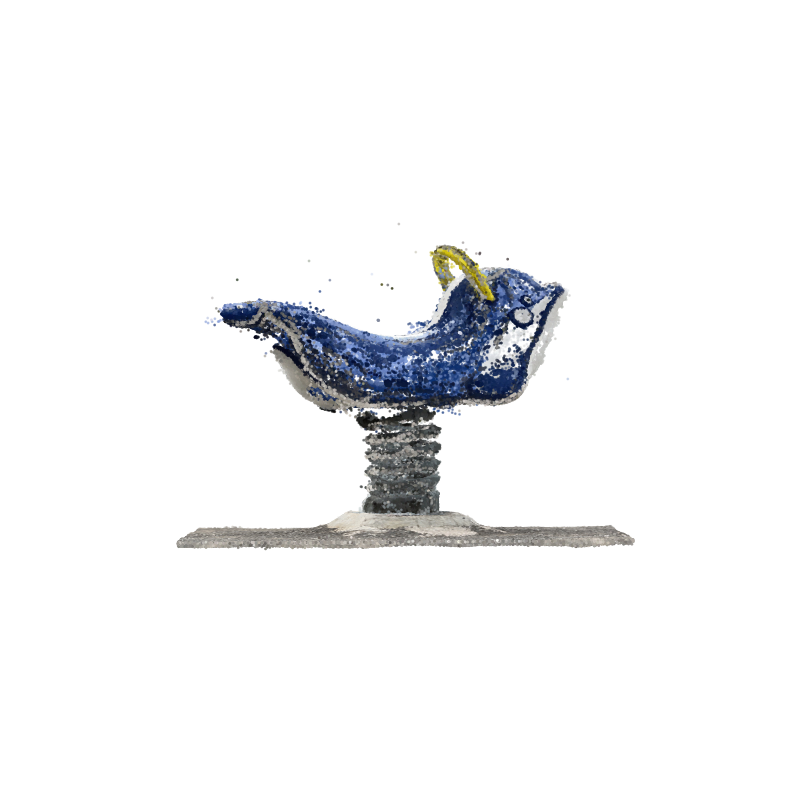

In [8]:
# Matplotlibで表示
ax = plt.axes(projection='3d')
ax.view_init(elev=0, azim=0)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

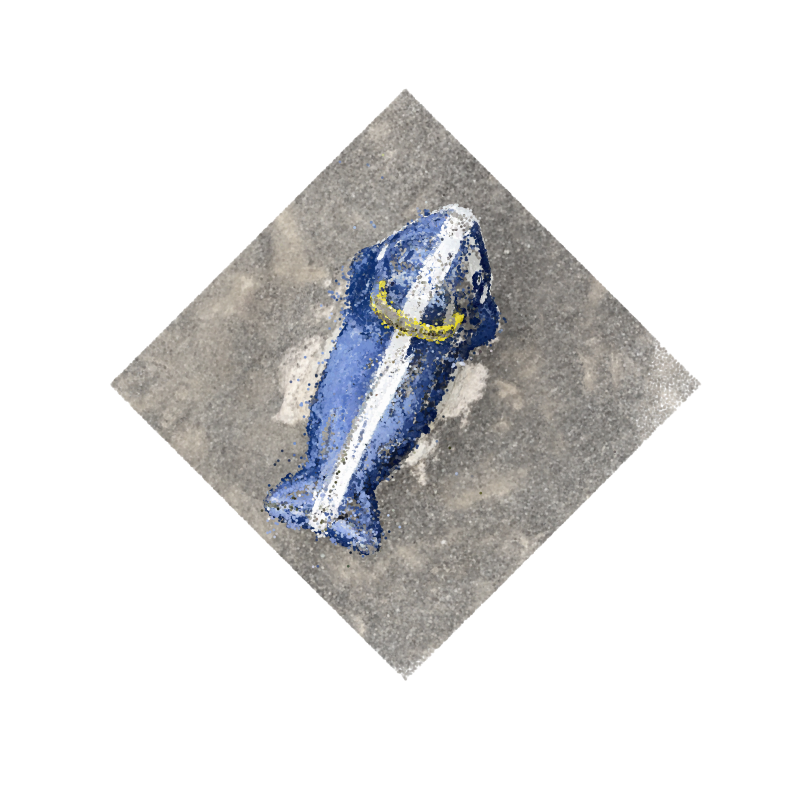

In [9]:
# 軸の仰角と方位を変更
ax = plt.axes(projection='3d')
ax.view_init(elev=90, azim=-45)  # 軸の仰角と方位を（ラジアンではなく）度単位で設定
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

メッシュデータ（OBJファイル）をOpen3dとPlotlyで可視化


In [10]:
# メッシュタイプ（OBJファイル）のデータを読み込み
mesh = o3d.io.read_triangle_mesh("/content/drive/MyDrive/Colab Notebooks/3d/02/image_in/iruka.obj")
if mesh.is_empty(): exit()

In [11]:
# 法線を計算
mesh.compute_vertex_normals()    # 頂点の法線を計算
mesh.compute_triangle_normals()  # 三角形の法線を計算

TriangleMesh with 58260 points and 102006 triangles.

In [12]:
# 頂点と三角形のデータをnp.array形式に変換
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)

# 色を設定
colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5  # 三角形の法線データで色を変化させる
colors = tuple(map(tuple, colors))

In [13]:
# Plotlyをインストール
!pip install plotly

In [14]:
# Plotlyをインポート
import plotly.graph_objects as graph_objects

In [ ]:
# Plotlyで表示。出力結果はマウスでインタラクティブに動かすことが可能です
fig = graph_objects.Figure(
    data=[
        graph_objects.Mesh3d(
            x=vertices[:,0],   # 頂点のX座標
            y=vertices[:,1],   # 頂点のY座標
            z=vertices[:,2],   # 頂点のZ座標
            i=triangles[:,0],  # 三角形の1番目の座標
            j=triangles[:,1],  # 三角形の2番目の座標
            k=triangles[:,2],  # 三角形の3番目の座標
            facecolor=colors,  # 面の色を設定
            opacity=0.50)      # 表面の不透明度を設定
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False), # X軸非表示
            yaxis=dict(visible=False), # Y軸非表示
            zaxis=dict(visible=False)  # Z軸非表示
        )
    )
)
fig.show()  # 表示